In [1]:
import pandas as pd

df = pd.read_excel("Datasets/MetroManilaAccidents(City).xlsx")
df.head()

,Damage_to_property,Fatal,Non_Fatal,Year,City
0,17820,94,4580,2020,Quezon
1,2334,6,536,2020,Mandaluyong
2,2022,18,950,2020,Marikina
3,3397,15,833,2020,Pasig
4,573,4,178,2020,San Juan


In [2]:
from sklearn.cluster import KMeans
import numpy as np

# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Damage_to_property', 'Fatal', 'Non_Fatal']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

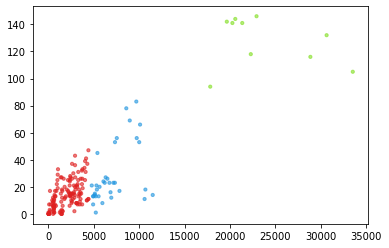

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df.Damage_to_property, df.Fatal, c=df.c, alpha = 0.6, s=10)

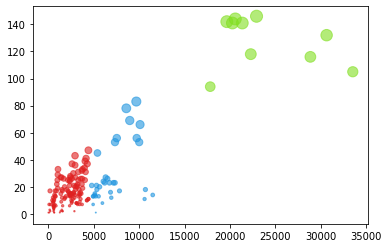

In [4]:
plt.scatter(df.Damage_to_property, df.Fatal, c=df.c, s=df.Fatal, alpha = 0.6)

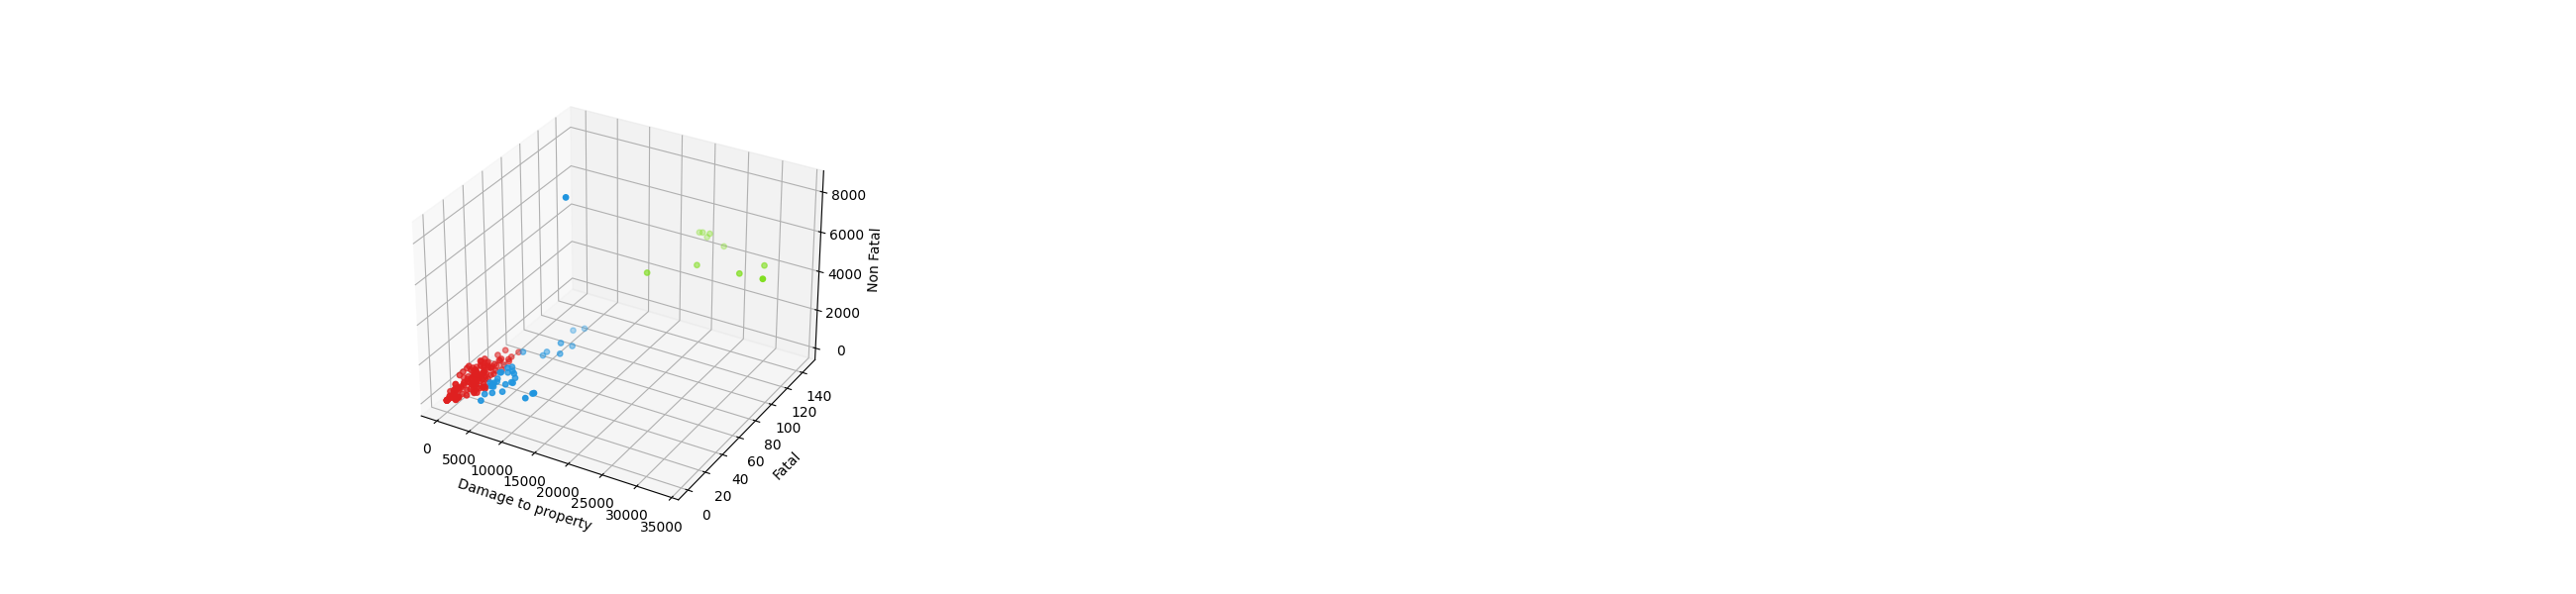

In [5]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
colors = ['#DF2020', '#81DF20', '#2095DF']
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Damage_to_property', 'Fatal', 'Non_Fatal']])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Damage_to_property, df.Fatal, df.Non_Fatal, c=df.c, s=15)
ax.set_xlabel('Damage to property')
ax.set_ylabel('Fatal')
ax.set_zlabel('Non Fatal')
plt.show()

Text(0, 0.5, 'Fatal')

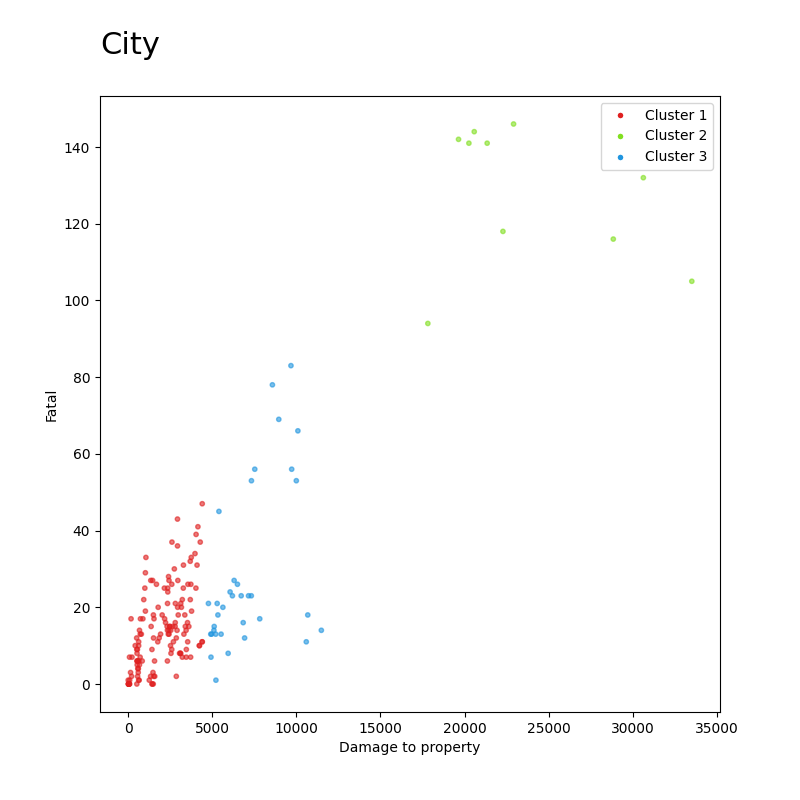

In [6]:
### BUILD A TWO DIMENSIONS CLUSTER AGAIN ###
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Damage_to_property', 'Fatal']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Damage_to_property, df.Fatal, c=df.c, alpha = 0.6, s=10)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('City\n', loc='left', fontsize=22)
plt.xlabel('Damage to property')
plt.ylabel('Fatal')

Text(0, 0.5, 'Fatal')

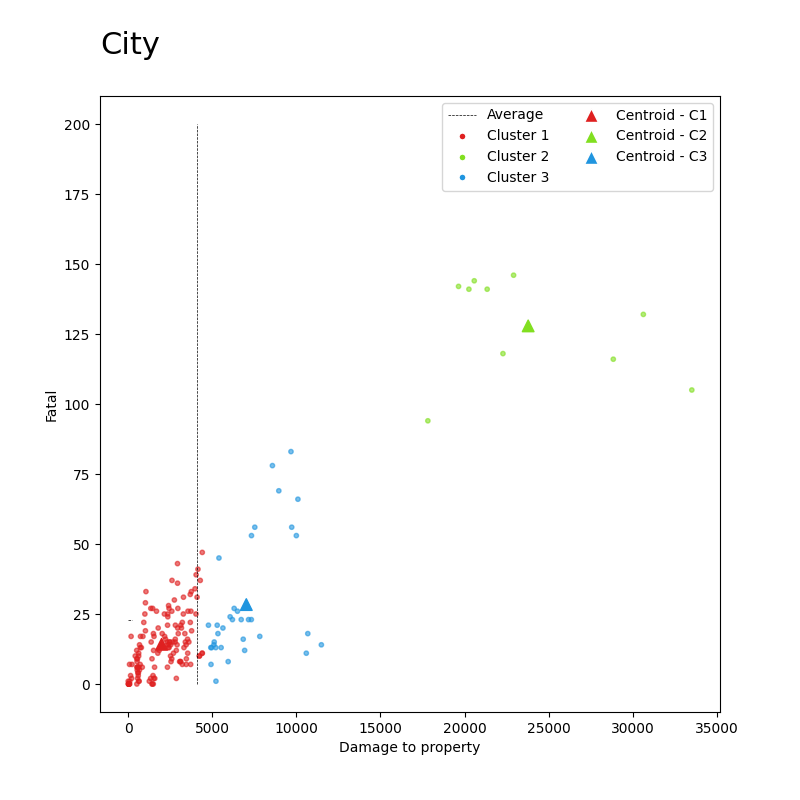

In [7]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Damage_to_property, df.Fatal, c=df.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot Fatal mean
plt.plot([df.Damage_to_property.mean()]*2, [0,200], color='black', lw=0.5, linestyle='--')
# plt.xlim(0,200)
# plot Non Fatal mean
plt.plot([0,200], [df.Fatal.mean()]*2, color='black', lw=0.5, linestyle='--')
# plt.ylim(0,200)
# create a list of legend elemntes
## average line
legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
## markers / records
cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
## centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# add all elements to the same list
legend_elements.extend(cluster_leg)
legend_elements.extend(cent_leg)
# plot legend
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# title and labels
plt.title('City\n', loc='left', fontsize=22)
plt.xlabel('Damage to property')
plt.ylabel('Fatal')

Text(0, 0.5, 'Fatal')

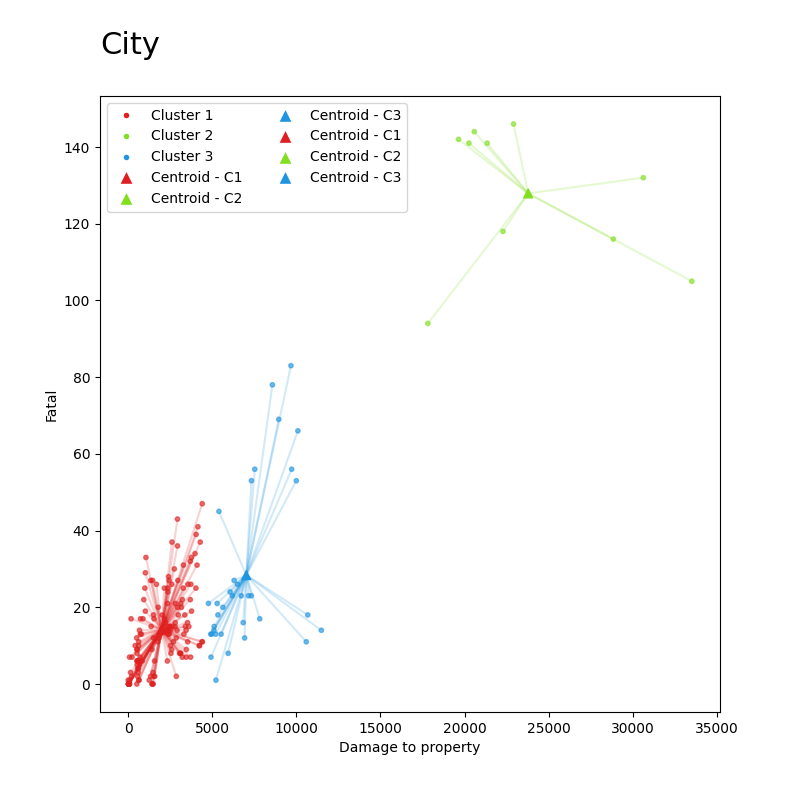

In [8]:
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Damage_to_property, df.Fatal, c=df.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=40)
# plot lines
for idx, val in df.iterrows():
    x = [val.Damage_to_property, val.cen_x,]
    y = [val.Fatal, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper left', ncol=2)
# x and y limits
# plt.xlim(0,200)
# plt.ylim(0,200)
# title and labels
plt.title('City\n', loc='left', fontsize=22)
plt.xlabel('Damage to property')
plt.ylabel('Fatal')

Text(0, 0.5, 'Fatal')

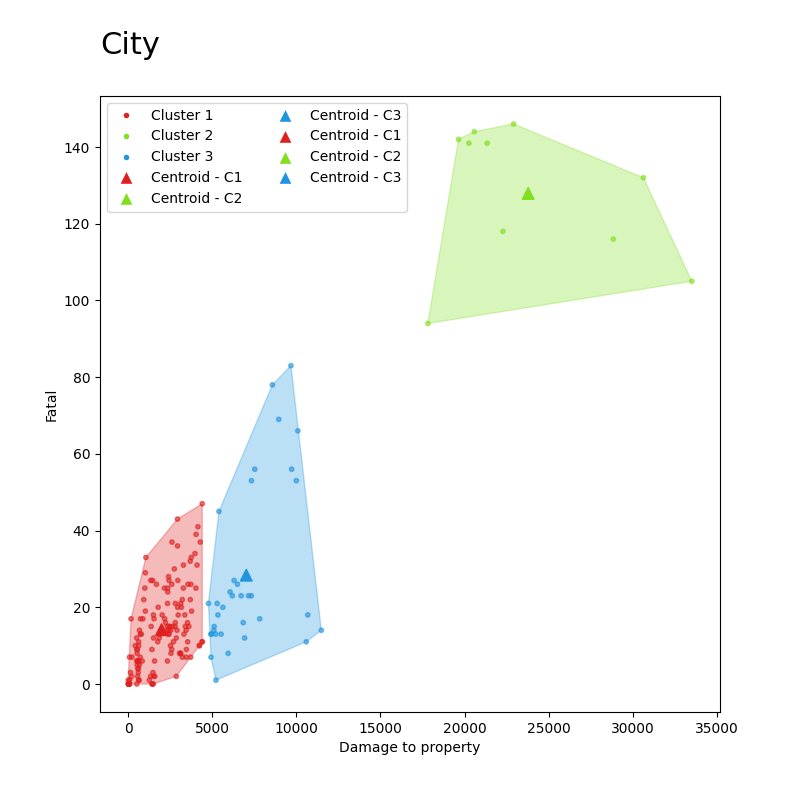

In [11]:
from scipy.spatial import ConvexHull
import numpy as np
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Damage_to_property, df.Fatal, c=df.c, alpha = 0.6, s=10)
# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# draw enclosure
for i in df.cluster.unique():
    points = df[df.cluster == i][['Damage_to_property', 'Fatal']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])

# label each data points
# data=df.iloc[:,0:2].values
# for i in range(len(data)):
#     x = data[i][0]
#     y = data[i][1]
#     plt.text(x * (1 + 0.01), y * (1 + 0.01), df.City[i], fontsize=8)
    
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper left', ncol=2)

plt.title('City\n', loc='left', fontsize=22)
plt.xlabel('Damage to property')
plt.ylabel('Fatal')
    
# plt.xlim(0,10000)
# plt.ylim(0,10000)